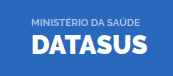

---
**Sugestões de Análise:**
* **Comparar a distribuição geográfica dos leitos por município antes e depois da pandemia**
* **Analisar a evolução do número de leitos no tempo**
* **Verificar se em algum momento pôde ser observado um declínio na capacidade hospitalar instalada**
* **Comparar a quantidade de leitos SUS e leitos não SUS no tempo e no espaço**

---

# 1. Carregando as dependências do projeto

In [1]:
# sistema
from os import system

# manipulação e tratamento de dados tabulares
import pandas as pd
import pysus.online_data.CNES as CNES
import pandasql as ps

# bibliotecas numéricas
import numpy as np

# bibliotecas de visualização e estatítica
import matplotlib.pyplot as plt
import seaborn as sns

---

# 2. Carregando a base de dados

**Tendo o objetivo de realizar uma análise exploratória para descrever a evolução da capacidade hospitalar (número de leitos) durante a pandemia de Covid-19 em Goiás, podemos considerar como período ```dez/2019``` (que foi tido como o primeiro mês do início da pandemia) até ```nov/2022``` (que é o último mês registrado na base de dados original antes da elaboração do presente relatório).**

**Além disso, iremos criar variáveis para representar uma estrutura tabular de dados ("dataframe") seguindo o padrão ```df_mes_ano```, em que:**
* **mes: 2 dígitos numéricos (01-12), representando o mês a ser utilizado para consulta**
* **ano: 2 dígitos numéricos, representando os dois últimos digitos do ano a ser utilizado para consulta**

In [2]:
# Verificando a data atual
system('date')

Sat Dec 31 05:06:54 PM -03 2022


0

**Desta forma, iremos manter o período descrito anteriormente como sendo a filtragem para gerar nossa base de dados. Além disso, vamos criar uma função para facilitar a leitura desses dados.**

In [3]:
def loadDataSUS(year,month,params={
    'group':'LT',
    'state':'GO'
}):
    df = CNES.download(params['group'],params['state'],year,month)
    df = pd.DataFrame(df) # convertendo em objeto Pandas
    if params['group'] == 'LT':
        # criando novos campos
        df['ano'] = [val.strip()[0:4] for val in df['COMPETEN']]
        df['mes'] = [val.strip()[4:] for val in df['COMPETEN']]
    return df

## (i) 2019

In [4]:
df_12_19 = loadDataSUS(2019,12)
df_12_19

2023-01-02 09:58:18.710 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2023-01-02 09:58:18.733 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2023-01-02 09:58:19.045 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO1912.dbc removed.
2023-01-02 09:58:19.340 | INFO     | pysus.online_data.CNES:download:83 - Data stored as parquet at /home/noetic-sierra/pysus/CNES_LTGO1912_.parquet


,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,ano,mes
0,9331603,520010,,,,,M,3,00000000000000,3,...,2,33,9,0,9,0,201912,1244,2019,12
1,2335506,520013,15,,,,M,3,00269860000125,1,...,2,41,2,0,2,0,201912,2062,2019,12
2,2335506,520013,15,,,,M,3,00269860000125,1,...,1,03,2,0,1,1,201912,2062,2019,12
3,2335506,520013,15,,,,M,3,00269860000125,1,...,4,10,1,0,1,0,201912,2062,2019,12
4,2335506,520013,15,,,,M,3,00269860000125,1,...,6,34,4,0,3,1,201912,2062,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2383691,522205,001,,,,M,3,00000000000000,3,...,4,43,1,0,1,0,201912,1244,2019,12
2806,2383691,522205,001,,,,M,3,00000000000000,3,...,5,45,3,0,3,0,201912,1244,2019,12
2807,2439883,522220,02,,,,M,3,00000000000000,3,...,5,45,4,0,4,0,201912,1244,2019,12
2808,2439883,522220,02,,,,M,3,00000000000000,3,...,2,33,7,0,7,0,201912,1244,2019,12


## (ii) 2020

In [5]:
df_01_20 = loadDataSUS(2020,1)
df_02_20 = loadDataSUS(2020,2)
df_03_20 = loadDataSUS(2020,3)
df_04_20 = loadDataSUS(2020,4)
df_05_20 = loadDataSUS(2020,5)
df_06_20 = loadDataSUS(2020,6)
df_07_20 = loadDataSUS(2020,7)
df_08_20 = loadDataSUS(2020,8)
df_09_20 = loadDataSUS(2020,9)
df_10_20 = loadDataSUS(2020,10)
df_11_20 = loadDataSUS(2020,11)
df_12_20 = loadDataSUS(2020,12)

2023-01-02 09:58:23.880 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2023-01-02 09:58:23.902 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2023-01-02 09:58:24.183 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2001.dbc removed.
2023-01-02 09:58:24.199 | INFO     | pysus.online_data.CNES:download:83 - Data stored as parquet at /home/noetic-sierra/pysus/CNES_LTGO2001_.parquet
2023-01-02 09:58:24.293 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2023-01-02 09:58:24.314 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2023-01-02 09:58:24.566 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2002.dbc removed.
2023-01-02 09:58:24.578 | INFO     | pysus.online_data.CNES:download:83 - D

## (iii) 2021

In [7]:
df_01_21 = loadDataSUS(2021,1)
df_02_21 = loadDataSUS(2021,2)
df_03_21 = loadDataSUS(2021,3)
df_04_21 = loadDataSUS(2021,4)
df_05_21 = loadDataSUS(2021,5)
df_06_21 = loadDataSUS(2021,6)
df_07_21 = loadDataSUS(2021,7)
df_08_21 = loadDataSUS(2021,8)
df_09_21 = loadDataSUS(2021,9)
df_10_21 = loadDataSUS(2021,10)
df_11_21 = loadDataSUS(2021,11)
df_12_21 = loadDataSUS(2021,12)

2023-01-02 09:58:33.481 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2023-01-02 09:58:33.504 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2023-01-02 09:58:33.508 | INFO     | pysus.online_data.CNES:download:75 - Local parquet data found at /home/noetic-sierra/pysus/CNES_LTGO2101_.parquet
2023-01-02 09:58:34.077 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2023-01-02 09:58:34.100 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2023-01-02 09:58:34.101 | INFO     | pysus.online_data.CNES:download:75 - Local parquet data found at /home/noetic-sierra/pysus/CNES_LTGO2102_.parquet
2023-01-02 09:58:34.225 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br

## (iv) 2022

In [8]:
df_01_22 = loadDataSUS(2022,1)
df_02_22 = loadDataSUS(2022,2)
df_03_22 = loadDataSUS(2022,3)
df_04_22 = loadDataSUS(2022,4)
df_05_22 = loadDataSUS(2022,5)
df_06_22 = loadDataSUS(2022,6)
df_07_22 = loadDataSUS(2022,7)
df_08_22 = loadDataSUS(2022,8)
df_09_22 = loadDataSUS(2022,9)
df_10_22 = loadDataSUS(2022,10)
df_11_22 = loadDataSUS(2022,11)

2023-01-02 09:58:38.393 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2023-01-02 09:58:38.415 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2023-01-02 09:58:38.687 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2201.dbc removed.
2023-01-02 09:58:38.701 | INFO     | pysus.online_data.CNES:download:83 - Data stored as parquet at /home/noetic-sierra/pysus/CNES_LTGO2201_.parquet
2023-01-02 09:58:38.845 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2023-01-02 09:58:38.867 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2023-01-02 09:58:39.141 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2202.dbc removed.
2023-01-02 09:58:39.154 | INFO     | pysus.online_data.CNES:download:83 - D

## (v) Geral: todos os anos

In [18]:
# Gerando o df principal a partir da concatenação dos anteriores
df_main = pd.concat([
    df_12_19, #2019
    df_01_20,df_02_20,df_03_20,df_04_20,df_05_20,df_06_20,df_07_20,df_08_20,df_09_20,df_10_20,df_11_20,df_12_20, #2020
    df_01_21,df_02_21,df_03_21,df_04_21,df_05_21,df_06_21,df_07_21,df_08_21,df_09_21,df_10_21,df_11_21,df_12_21, #2021
    df_01_22,df_02_22,df_03_22,df_04_22,df_05_22,df_06_20,df_07_22,df_08_22,df_09_22,df_10_22,df_11_22 #2022
])

df_main = df_main[['CODUFMUN','MICR_REG','DISTRADM','TPGESTAO',
                   'PF_PJ','NIV_DEP','ATIVIDAD','CLIENTEL','TP_UNID',
                   'TP_LEITO','QT_EXIST','QT_CONTR','QT_SUS','ano','mes']]

df_main['index'] = [x for x in range(len(df_main))] # criação de um ID para facilitar posteriormente a remoção de linhas duplicadas
df_main

,CODUFMUN,MICR_REG,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_UNID,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS,ano,mes,index
0,520010,,,M,3,3,04,03,15,2,9,0,9,2019,12,0
1,520013,,,M,3,1,04,03,05,2,2,0,2,2019,12,1
2,520013,,,M,3,1,04,03,05,1,2,0,1,2019,12,2
3,520013,,,M,3,1,04,03,05,4,1,0,1,2019,12,3
4,520013,,,M,3,1,04,03,05,6,4,0,3,2019,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,522205,,,M,3,3,04,03,05,1,3,0,3,2022,11,106221
2940,522205,,,M,3,3,04,03,05,4,3,0,3,2022,11,106222
2941,522220,,,M,3,3,04,03,05,2,7,0,7,2022,11,106223
2942,522220,,,M,3,3,04,03,05,4,2,0,2,2022,11,106224


**Fazendo as tratativas individuais nas colunas**

In [9]:
df_main.MICR_REG.value_counts()

          100634
SUL         2632
SUDEST      1401
00           545
04           324
0004         216
SUDOES       186
CENTRO       144
NORTE        144
Name: MICR_REG, dtype: int64

In [19]:
# Verificando registros vazios, podemos defini-los como não listados
new_val = []
for mr in df_main.MICR_REG.values:
    if mr == '' or mr == ' ':
        new_val.append('NÃO LISTADO')
    else:
        new_val.append(mr)
df_main['MICR_REG'] = new_val

In [11]:
df_main.DISTRADM.value_counts()

        105089
00         545
04         324
0004       216
HOSP        52
Name: DISTRADM, dtype: int64

In [20]:
# Verificando registros vazios, podemos defini-los como não listados
new_val = []
for da in df_main.DISTRADM.values:
    if da == '' or da == ' ':
        new_val.append('NÃO LISTADO')
    else:
        new_val.append(da)
df_main['DISTRADM'] = new_val

In [21]:
# Decodificando o tipo de pessoa de acordo com o dicionário dos dados oficial (física ou jurídica)
new_val = []
for pfpj in df_main.PF_PJ.values:
    if pfpj == '1':
        new_val.append('PESSOA FÍSICA')
    else: 
        new_val.append('PESSOA JURÍDICA')
df_main['PF_PJ'] = new_val

In [22]:
# Decodificando nível da dependência acordo com o dicionário dos dados oficial (individual ou mantida)
new_val = []
for dep in df_main.NIV_DEP.values:
    if dep == '1':
        new_val.append('INDIVIDUAL')
    else: 
        new_val.append('MANTIDA')
df_main['NIV_DEP'] = new_val

In [15]:
df_main.CLIENTEL.value_counts()

03    82977
01    18963
02     3718
        568
Name: CLIENTEL, dtype: int64

In [23]:
# Verificando registros vazios, podemos defini-los como não listados
new_val = []
for clt in df_main.CLIENTEL.values:
    if clt == '' or clt == ' ':
        new_val.append('NÃO LISTADO')
    else:
        new_val.append(clt)
df_main['CLIENTEL'] = new_val

In [24]:
df_main.head() # confirmando as alterações

,CODUFMUN,MICR_REG,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_UNID,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS,ano,mes,index
0,520010,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,15,2,9,0,9,2019,12,0
1,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,2,2,0,2,2019,12,1
2,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,1,2,0,1,2019,12,2
3,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,4,1,0,1,2019,12,3
4,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,6,4,0,3,2019,12,4


* **Verificando os dtypes e contagem de NaN (nulos)**

In [25]:
# alterando os dtypes
df_main = df_main.astype({
    'CODUFMUN':'string',
    'MICR_REG':'string',
    'DISTRADM':'string',
    'TPGESTAO':'string',
    'PF_PJ':'string',
    'NIV_DEP':'string',
    'ATIVIDAD':'string',
    'CLIENTEL':'string',
    'TP_UNID':'string',
    'TP_LEITO':'string',
    'QT_EXIST':'int32',
    'QT_CONTR':'int32',
    'QT_SUS':'int32',
    'ano':'string',
    'mes':'string'
})

# informação detalhada dos campos com a contagem de nulos
df_main.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106226 entries, 0 to 2943
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CODUFMUN  106226 non-null  string
 1   MICR_REG  106226 non-null  string
 2   DISTRADM  106226 non-null  string
 3   TPGESTAO  106226 non-null  string
 4   PF_PJ     106226 non-null  string
 5   NIV_DEP   106226 non-null  string
 6   ATIVIDAD  106226 non-null  string
 7   CLIENTEL  106226 non-null  string
 8   TP_UNID   106226 non-null  string
 9   TP_LEITO  106226 non-null  string
 10  QT_EXIST  106226 non-null  int32 
 11  QT_CONTR  106226 non-null  int32 
 12  QT_SUS    106226 non-null  int32 
 13  ano       106226 non-null  string
 14  mes       106226 non-null  string
 15  index     106226 non-null  int64 
dtypes: int32(3), int64(1), string(12)
memory usage: 12.6 MB


---

# 3. Base de dados secundária (listagem de municípios de GO)

* **Disponível em: https://www.ibge.gov.br/explica/codigos-dos-municipios.php**

In [26]:
# carregando os dados e alterando os dtypes
df_municipios=pd.read_csv(
    'RELATORIO_DTB_BRASIL_MUNICIPIO.csv').astype({
    'UF':'string',
    'Nome_UF':'string',
    'Regiao_Geografica_Imediata':'string',
    'Nome_Mesorregiao':'string',
    'Nome_Microrregiao':'string',
    'Nome_Municipio':'string'
})

# Filtragem apenas dos municípios de Goiás e redução das colunas
df_municipios = df_municipios.loc[df_municipios['UF']=='52'][[
    'UF','Nome_UF','Regiao_Geografica_Imediata',
    'Nome_Mesorregiao','Nome_Microrregiao','Nome_Municipio']] 
df_municipios

,UF,Nome_UF,Regiao_Geografica_Imediata,Nome_Mesorregiao,Nome_Microrregiao,Nome_Municipio
5323,52,Goiás,520001,Centro Goiano,Goiânia,Abadia de Goiás
5324,52,Goiás,520002,Leste Goiano,Entorno de Brasília,Abadiânia
5325,52,Goiás,520015,Sul Goiano,Vale do Rio dos Bois,Acreúna
5326,52,Goiás,520003,Centro Goiano,Anicuns,Adelândia
5327,52,Goiás,520022,Leste Goiano,Entorno de Brasília,Água Fria de Goiás
...,...,...,...,...,...,...
5564,52,Goiás,520001,Sul Goiano,Vale do Rio dos Bois,Varjão
5565,52,Goiás,520002,Sul Goiano,Pires do Rio,Vianópolis
5566,52,Goiás,520009,Sul Goiano,Meia Ponte,Vicentinópolis
5567,52,Goiás,520022,Leste Goiano,Entorno de Brasília,Vila Boa


In [20]:
df_municipios.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 5323 to 5568
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   UF                          246 non-null    string
 1   Nome_UF                     246 non-null    string
 2   Regiao_Geografica_Imediata  246 non-null    string
 3   Nome_Mesorregiao            246 non-null    string
 4   Nome_Microrregiao           246 non-null    string
 5   Nome_Municipio              246 non-null    string
dtypes: string(6)
memory usage: 13.5 KB


**Para que possamos relacionar as duas tabelas (leitos e municípios), afim de enriquecer nossas análises geográficas, iremos utilizar uma consulta via SQL para facilitar essa tratativa**

In [27]:
query = """
        SELECT 
               df_main.*,
               CASE
                   WHEN df_municipios.Nome_Mesorregiao ISNULL THEN 'NÃO LISTADO'
                   ELSE df_municipios.Nome_Mesorregiao
               END AS Nome_Mesorregiao,
               CASE
                   WHEN df_municipios.Nome_Microrregiao ISNULL THEN 'NÃO LISTADO'
                   ELSE df_municipios.Nome_Microrregiao
               END AS Nome_Microrregiao,
               CASE
                   WHEN df_municipios.Nome_Municipio ISNULL THEN 'NÃO LISTADO'
                   ELSE df_municipios.Nome_Municipio
               END AS Nome_Municipio
        FROM df_main 
        LEFT JOIN df_municipios ON df_municipios.Regiao_Geografica_Imediata = df_main.CODUFMUN
        """
df_joined = pd.DataFrame(ps.sqldf(query,locals())).drop_duplicates(["index"])
df_joined

,CODUFMUN,MICR_REG,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_UNID,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS,ano,mes,index,Nome_Mesorregiao,Nome_Microrregiao,Nome_Municipio
0,520010,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,15,2,9,0,9,2019,12,0,Sul Goiano,Meia Ponte,Porteirão
14,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,2,2,0,2,2019,12,1,Centro Goiano,Anicuns,Aurilândia
23,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,1,2,0,1,2019,12,2,Centro Goiano,Anicuns,Aurilândia
32,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,4,1,0,1,2019,12,3,Centro Goiano,Anicuns,Aurilândia
41,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,6,4,0,3,2019,12,4,Centro Goiano,Anicuns,Aurilândia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111207,522205,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,1,3,0,3,2022,11,106221,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO
111208,522205,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,4,3,0,3,2022,11,106222,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO
111209,522220,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,2,7,0,7,2022,11,106223,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO
111210,522220,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,4,2,0,2,2022,11,106224,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO


In [28]:
df_joined.MICR_REG.value_counts()

NÃO LISTADO    100634
SUL              2632
SUDEST           1401
00                545
04                324
0004              216
SUDOES            186
CENTRO            144
NORTE             144
Name: MICR_REG, dtype: int64

In [29]:
df_joined.Nome_Microrregiao.value_counts()

NÃO LISTADO    105632
Anicuns           504
Ceres              54
Meia Ponte         36
Name: Nome_Microrregiao, dtype: int64

**Podemos observar que existem dois campos para uma mesma informação, e que ambos possuem dados como sendo do tipo "NÃO LISTADO". Para sintetizar e deixar essa métrica mais acessível para as próximas etapas, iremos fazer uma tratativa como segue**

In [24]:
new_val = []
for mr1,mr2 in zip(df_joined.MICR_REG.values,df_joined.Nome_Microrregiao.values):
    if mr1 != 'NÃO LISTADO' and mr2 == 'NÃO LISTADO':
        new_val.append(mr1)
    elif mr1 == 'NÃO LISTADO' and mr2 != 'NÃO LISTADO':
        new_val.append(mr2)
    else:
        new_val.append('NÃO LISTADO')

In [30]:
df_sintetizado = pd.DataFrame({
    'ANO':df_joined.ano,'MES':df_joined.mes,
    'MESO_REG':df_joined.Nome_Mesorregiao,'MICR_REG':new_val,'MUNICIPIO':df_joined.Nome_Municipio,
    'DISTRADM':df_joined.DISTRADM,'TPGESTAO':df_joined.TPGESTAO,'PF_PJ':df_joined.PF_PJ,
    'NIV_DEP':df_joined.NIV_DEP,'ATIVIDAD':df_joined.ATIVIDAD,'CLIENTEL':df_joined.CLIENTEL,
    'TP_LEITO':df_joined.TP_LEITO,'QT_EXIST':df_joined.QT_EXIST,
    'QT_CONTR':df_joined.QT_CONTR,'QT_SUS':df_joined.QT_SUS
}).astype({
    'ANO':'string','MES':'string','MESO_REG':'string','MICR_REG':'string','MUNICIPIO':'string',
    'DISTRADM':'category','TPGESTAO':'category','PF_PJ':'category','NIV_DEP':'category','ATIVIDAD':'category',
    'CLIENTEL':'category','TP_LEITO':'category','QT_EXIST':'int32','QT_CONTR':'int32','QT_SUS':'int32'
})
df_sintetizado

,ANO,MES,MESO_REG,MICR_REG,MUNICIPIO,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS
0,2019,12,Sul Goiano,03,Porteirão,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,2,9,0,9
14,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,2,2,0,2
23,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,1,2,0,1
32,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,4,1,0,1
41,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,6,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111207,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,1,3,0,3
111208,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,4,3,0,3
111209,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,2,7,0,7
111210,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,4,2,0,2


**Este é nosso dataframe final que deverá ser utilizado na etapa de análise exploratória.**

---

# 4. Análise Exploratória dos Dados

## (i) Interpretação estatística geral:

**Para a compreensão estatística dos nossos dados, iremos nesta etapa observar apenas as variáveis quantitativas, pois são estritamente numéricas**

### >> Distribuição Geral

In [31]:
df_sintetizado.describe(percentiles=[.001,.01,.1,.25,.5,.75,.9,.99,.999])

,QT_EXIST,QT_CONTR,QT_SUS
count,106226.000000,106226.0,106226.000000
mean,7.259983,0.0,4.363009
std,15.008795,0.0,11.488814
min,0.000000,0.0,0.000000
0.1%,1.000000,0.0,0.000000
1%,1.000000,0.0,0.000000
10%,1.000000,0.0,0.000000
25%,2.000000,0.0,0.000000
50%,4.000000,0.0,1.000000
75%,8.000000,0.0,4.000000


**Do resultado mostrado acima, podemos observar:**
* **QT_EXIST: apresenta dados bem próximos até o percentil de 75%, aproximadamente. Após essa divisão, podemos observar grandes saltos de valores, o que pode indicar presença de outliers na distribuição.**
* **QT_CONTR: apresenta um total de 0 registros durante todo o histórico analisado. Esta variável em específico não será considerada nas análises posteriores.**
* **QT_SUS: da mesma forma que ocorreu com QT_EXIST, até o percentil de 75% os valores estão relativamente próximos uns dos outros. Após essa divisão começamos a notar saltos de valores, uma possível evidência de outliers.**

### >> Histogramas, Curvas de Densidade e Box-Plot

#### Geral

/tmp/ipykernel_16229/1776926402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sintetizado[c],rug=True)
/tmp/ipykernel_16229/1776926402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sintetizado[c],rug=True)


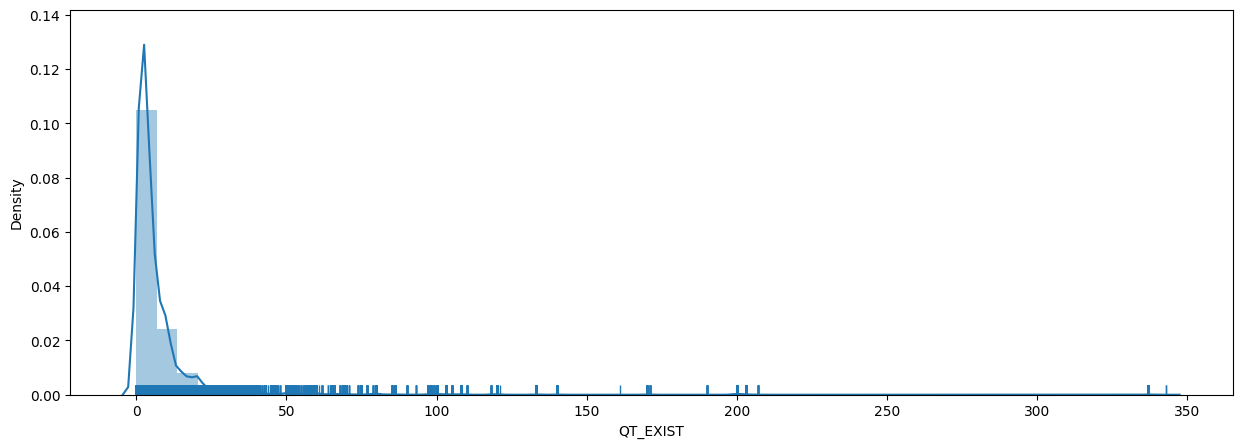

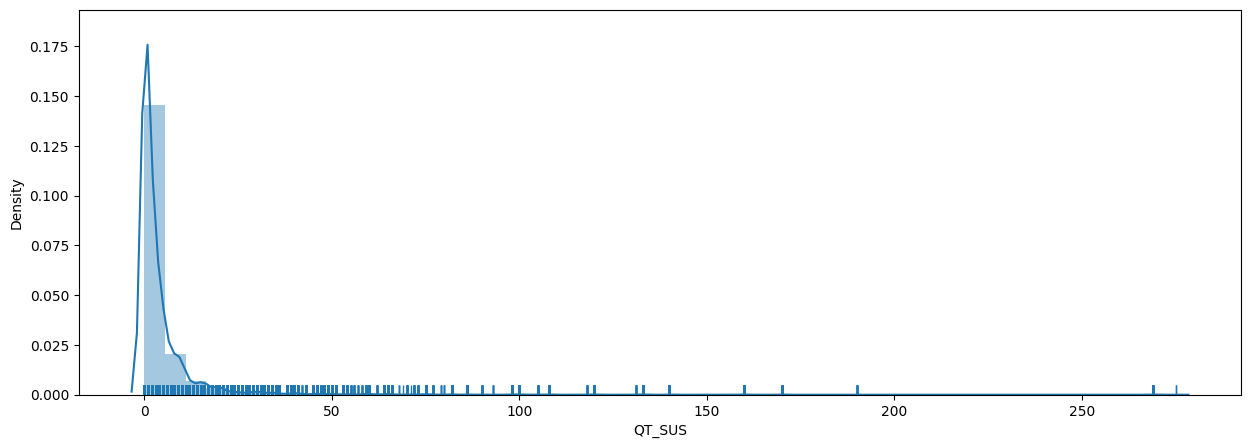

In [85]:
cols = ['QT_EXIST','QT_SUS']
for c in cols:
    plt.figure(figsize=(15,5))
    sns.distplot(df_sintetizado[c],rug=True)

**Os resultados mostrados acima para as distribuições de densidade e histogramas de QT_EXIST e QT_SUS revelam curvas do tipo *"right skewed"*. Podemos observar certos gaps nos intervalos, isto é, como suspeitado anteriormente pela tabela dos percentis existem saltos nas contagens de leitos, o que é novamente um forte indício de outliers. Apesar de não termos ainda uma análise explícita no tempo, podemos suspeitar que esses outliers sejam referentes aos meses de maior gravidade da pandemia, em que a demanda por leitos aumentou gradativamente. 
Podemos estender essas análises de distribuição partindo diretamente para o Boxplot, que é mais intuitivo para a identificação de outliers.**

#### Quantidade de Leitos Existentes (QT_EXIST)

<AxesSubplot: xlabel='QT_EXIST', ylabel='NIV_DEP'>

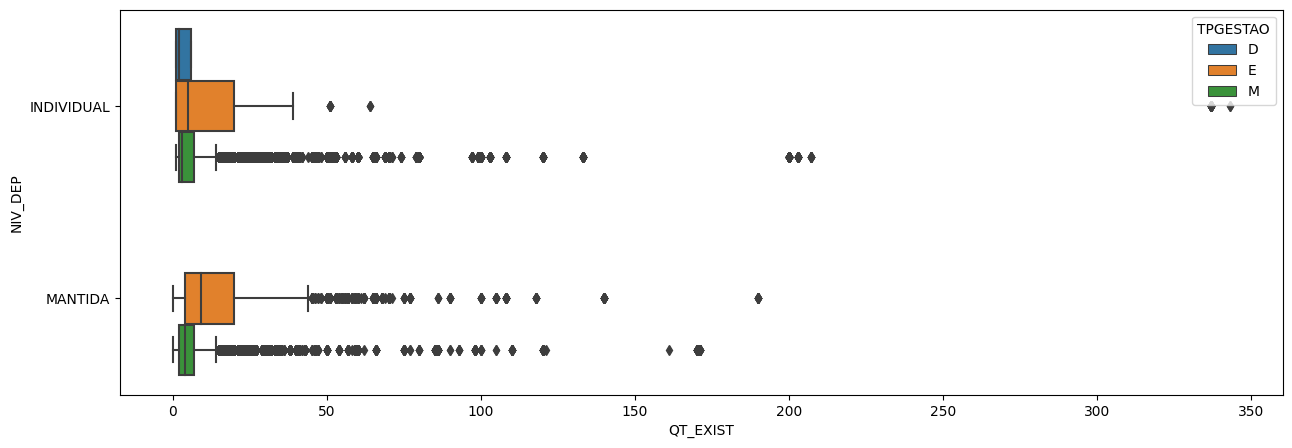

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_sintetizado, x="QT_EXIST", y="NIV_DEP", hue="TPGESTAO")

#### Quantidade de Leitos Contratados (QT_SUS)

<AxesSubplot: xlabel='QT_SUS', ylabel='NIV_DEP'>

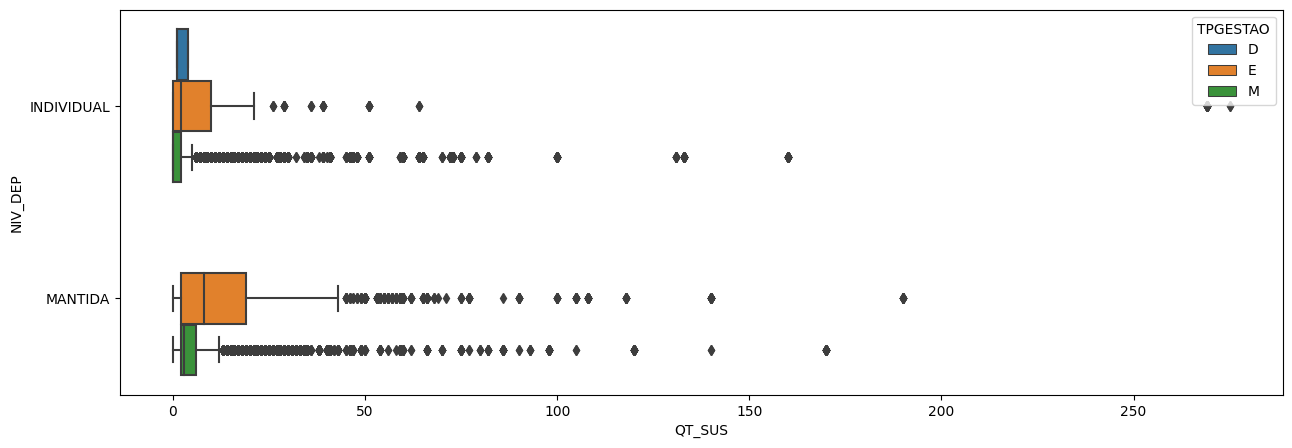

In [65]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_sintetizado, x="QT_SUS", y="NIV_DEP", hue="TPGESTAO")

**Dos boxplots apresentados anteriormente podemos observar que existe a grande concentração de outliers como suspeitado inicialmente. A análise foi feita pelo agrupamento do nível de dependência (representado pelo eixo y do gráfico) e a coloração indica o tipo da gestão. Com relação à gestão, apenas a do tipo D se manteve bastante limitada no domínio de QT_EXIST e QT_SUS, inclusive sem outliers (essa gestão ficou restrita ao nível individual de dependência). Para as duas outras gestões (E,M), podemos observar grande representatividade tanto na dependência individual, quanto na dependência mantida. Essas gestões são as que mais impactaram no surgimento de outliers para as duas variáveis quantitativas em análise. Novamente não temos ainda uma conclusão explícita desses saltos de quantidade de leitos no tempo, mas isso deve ser retomado nas análises posteriores com mais detalhes.**

## (ii) Correlação Numérica (Pearson) e Dispersão Quantitativa

<AxesSubplot: >

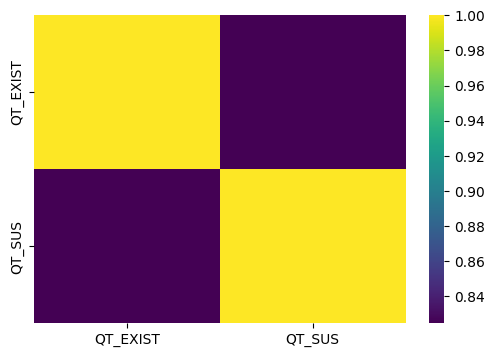

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df_sintetizado.drop(['QT_CONTR'], axis=1).corr(), annot=False, cmap='viridis')

<AxesSubplot: xlabel='QT_SUS', ylabel='QT_EXIST'>

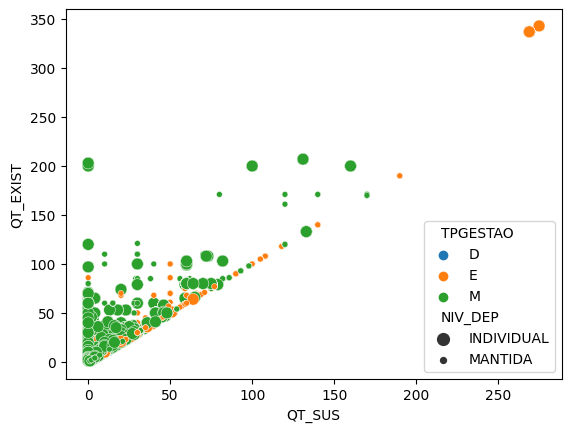

In [120]:
sns.scatterplot(data=df_sintetizado, x="QT_SUS", y="QT_EXIST", hue="TPGESTAO", size="NIV_DEP")

**A matriz de correlação apresentada (analisada estritamente para as variáveis numéricas quantitativas QT_EXIST e QT_SUS, neste caso) revela que existe uma correlação relativamente alta, sendo σ≈0.84. Isso pode ainda ser complementado pelo gráfico de dispersão para as duas variáveis, em que percebe-se uma tendência de variação linear diretamente proporcional (ao passo que uma aumenta, a outra tende a acompanhar), sobretudo nos cenários de um tipo de gestão "E" para nível de dependência mantida.**

## (iii) Comparação da distribuição geográfica dos leitos por município antes e depois da pandemia

**Nesta etapa, iremos fazer as seguintes considerações:**
* **Dado o objetivo principal de gerar insights ```durante a pandemia```, a base de dados foi gerada a partir de dez/19 (como mencionado inicialmente neste documento).**
* **O atual cenário ainda permanece como sendo de pandemia, portanto o evento ainda não cessou no momento da elaboração deste documento.**
* **Considerados os pontos anteriores, iremos assumir como um cenário ```anterior``` à pandemia todos os meses que antecedem a primeira dosagem da vacina no Brasil, datada por volta de jan/21 (https://g1.globo.com/sp/sao-paulo/noticia/2022/01/17/ha-um-ano-sp-vacinava-1a-pessoa-contra-covid-no-brasil-veja-o-que-mudou-e-projecoes-para-o-futuro.ghtml) e contados a partir de dez/19. Da mesma forma, assumiremos como um cenário ```posterior``` à pandemia (de forma simbólica) todos os meses posteriores, contados a partir de jan/21 até o momento.**

**Antes de analisar de fato as distribuições geográficas dos leitos, vamos observar de uma forma quantitativa a representatividade de cada um dos campos que indicam localidades dos nossos registros obtidos**

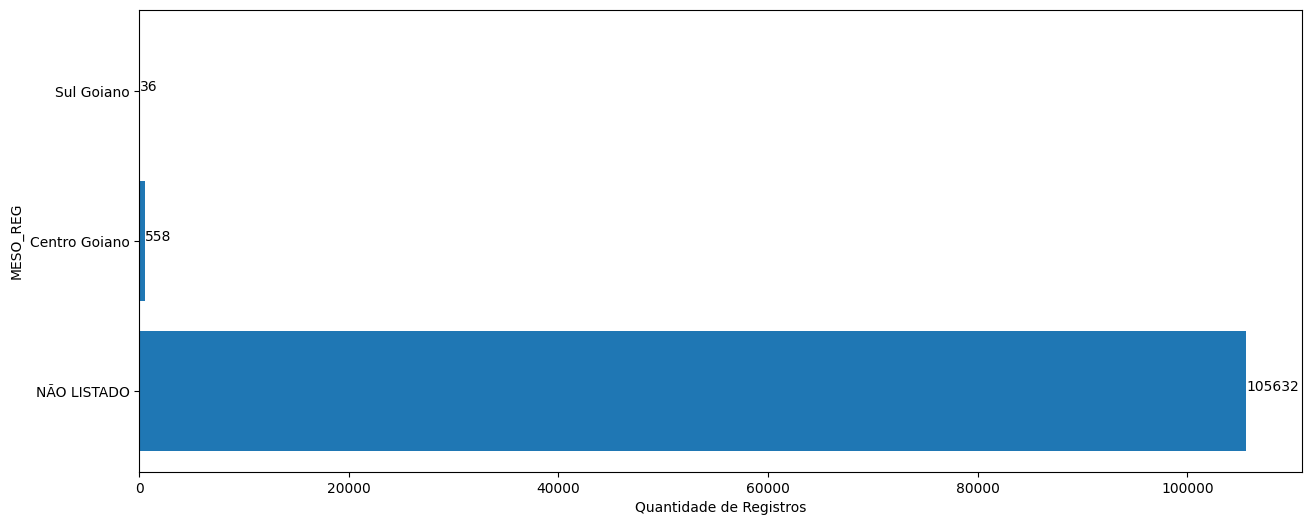

In [148]:
x = df_sintetizado.MESO_REG.value_counts().index
y = df_sintetizado.MESO_REG.value_counts().values

plt.figure(figsize=(15,6))
plt.barh(x,y)
plt.xlabel('Quantidade de Registros')
plt.ylabel('MESO_REG')
for index, value in enumerate(y):
    plt.text(value,index,str(value))

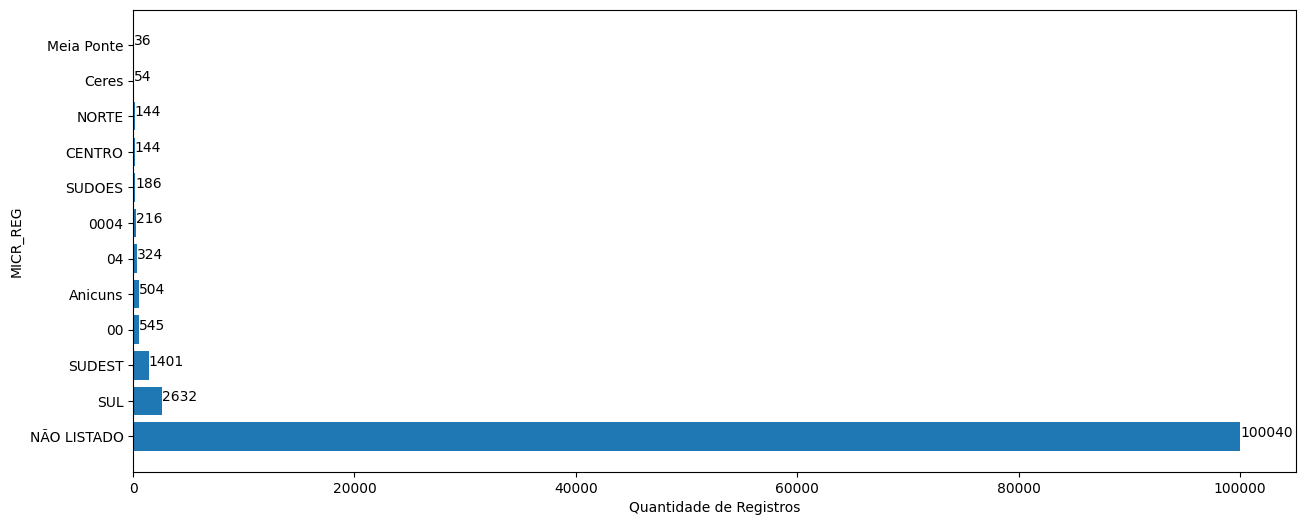

In [149]:
x = df_sintetizado.MICR_REG.value_counts().index
y = df_sintetizado.MICR_REG.value_counts().values

plt.figure(figsize=(15,6))
plt.barh(x,y)
plt.xlabel('Quantidade de Registros')
plt.ylabel('MICR_REG')
for index, value in enumerate(y):
    plt.text(value,index,str(value))

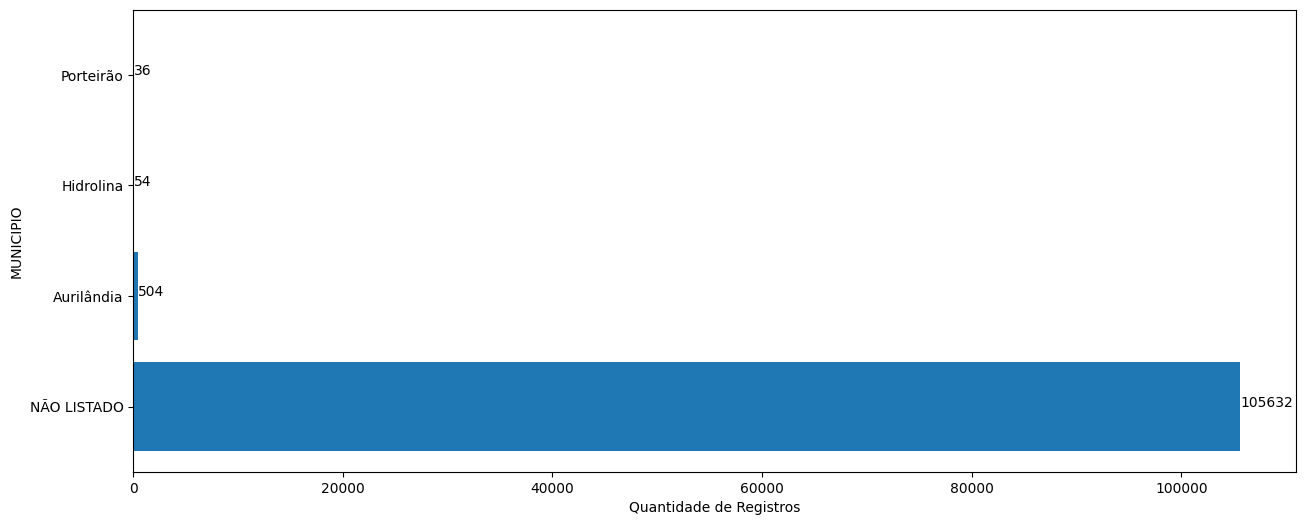

In [150]:
x = df_sintetizado.MUNICIPIO.value_counts().index
y = df_sintetizado.MUNICIPIO.value_counts().values

plt.figure(figsize=(15,6))
plt.barh(x,y)
plt.xlabel('Quantidade de Registros')
plt.ylabel('MUNICIPIO')
for index, value in enumerate(y):
    plt.text(value,index,str(value))

**Como podemos observar, a representatividade dos dados tidos como "NÃO LISTADO" é bastante alta quando comparada aos demais agrupamentos. Vale lembrar que esse tratamento foi feito por escolha própria. Poderíamos, por exemplo, ter excluído os registros nulos ou preenchidos com espaçamentos em branco vindos da base de dados original. Ou até mesmo ter preenchido eles com a moda dos valores para cada coluna analisada. No entanto, optou-se pelo agrupamento em não definido justamente para se evitar criar viés nas análises (agrupar dados pela moda quando não seria a representação real, por exemplo) e também por facilitar o entendimento como um todo (uma grande representatividade de dados não listados pode reforçar a ideia de que a forma de coleta e registros não está sendo feita da maneira adequada, o que fomenta a questão da necessidade de melhoria das bases por parte de um time de engenharia ou do sistema de ingestão dos mesmos dentro de um Data Warehouse).**

**Com o objetivo de sermos os mais fiéis possível aos dados obtidos, iremos olhar para cada um dos campos (meso e micro regiões e municípios) como sendo as representantes geográficas de interesse (e não focando somente nos municípios nesta etapa, já que pôde-se observar pouca variação na categoria).**

**Criando os dados antes e depois da pandemia, conforme as considerações feitas acima:**

In [32]:
# Dados referentes ao cenário antes da pandemia
query = """
        SELECT 
               *
        FROM df_sintetizado dfs
        WHERE
            dfs.ANO IN ('2019','2020')
            AND dfs.MES IN ('01','02','03','04','05','06',
                            '07','08','09','10','11','12')
        """

df_antes = pd.DataFrame(ps.sqldf(query,locals()))
df_antes

,ANO,MES,MESO_REG,MICR_REG,MUNICIPIO,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS
0,2019,12,Sul Goiano,03,Porteirão,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,2,9,0,9
1,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,2,2,0,2
2,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,1,2,0,1
3,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,4,1,0,1
4,2019,12,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,6,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40322,2020,06,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,2,5,0,5
40323,2020,06,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,1,3,0,3
40324,2020,06,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,2,7,0,7
40325,2020,06,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,4,2,0,2


<AxesSubplot: title={'center': 'Quantidade de Leitos SUS'}, xlabel='TP_LEITO', ylabel='QT_SUS'>

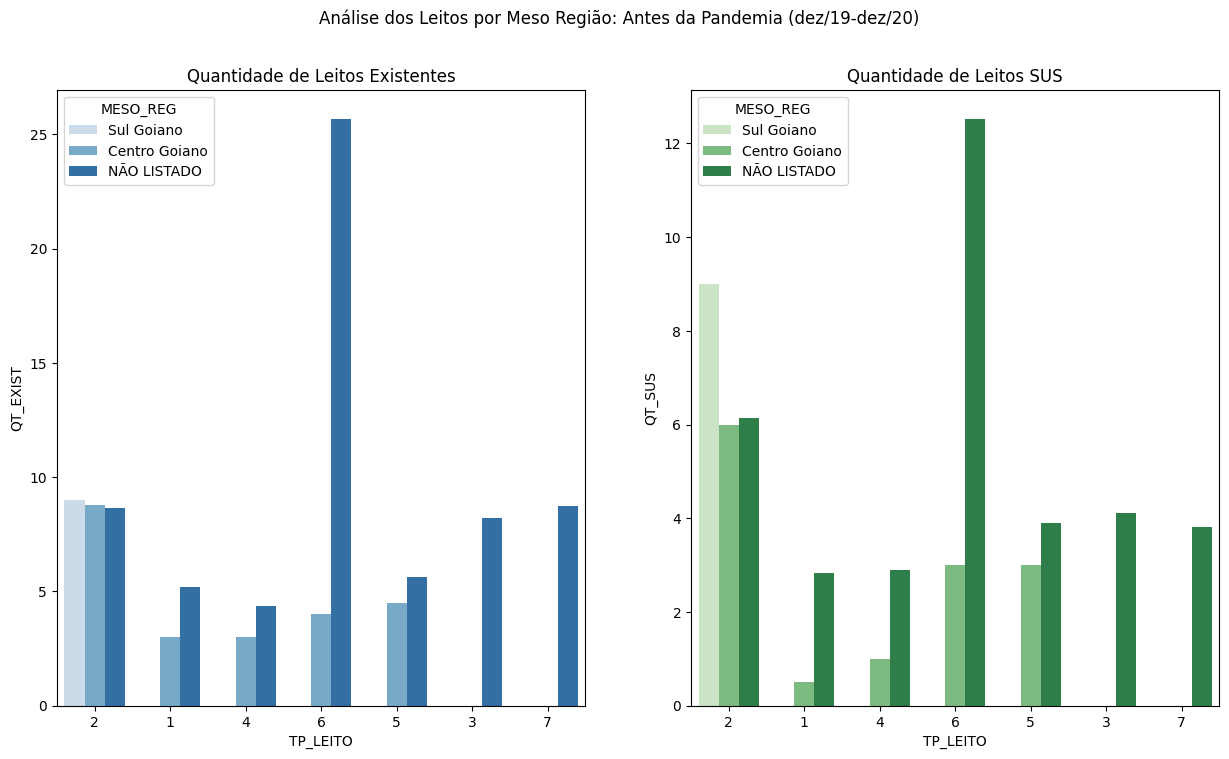

In [33]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,8))
fig.suptitle('Análise dos Leitos por Meso Região: Antes da Pandemia (dez/19-dez/20)')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.barplot(ax=axes[0],data=df_antes,x="TP_LEITO",y="QT_EXIST",hue="MESO_REG",palette='Blues',errorbar=None)
sns.barplot(ax=axes[1],data=df_antes,x="TP_LEITO",y="QT_SUS",hue="MESO_REG",palette='Greens',errorbar=None)

<AxesSubplot: title={'center': 'Quantidade de Leitos SUS'}, xlabel='TP_LEITO', ylabel='QT_SUS'>

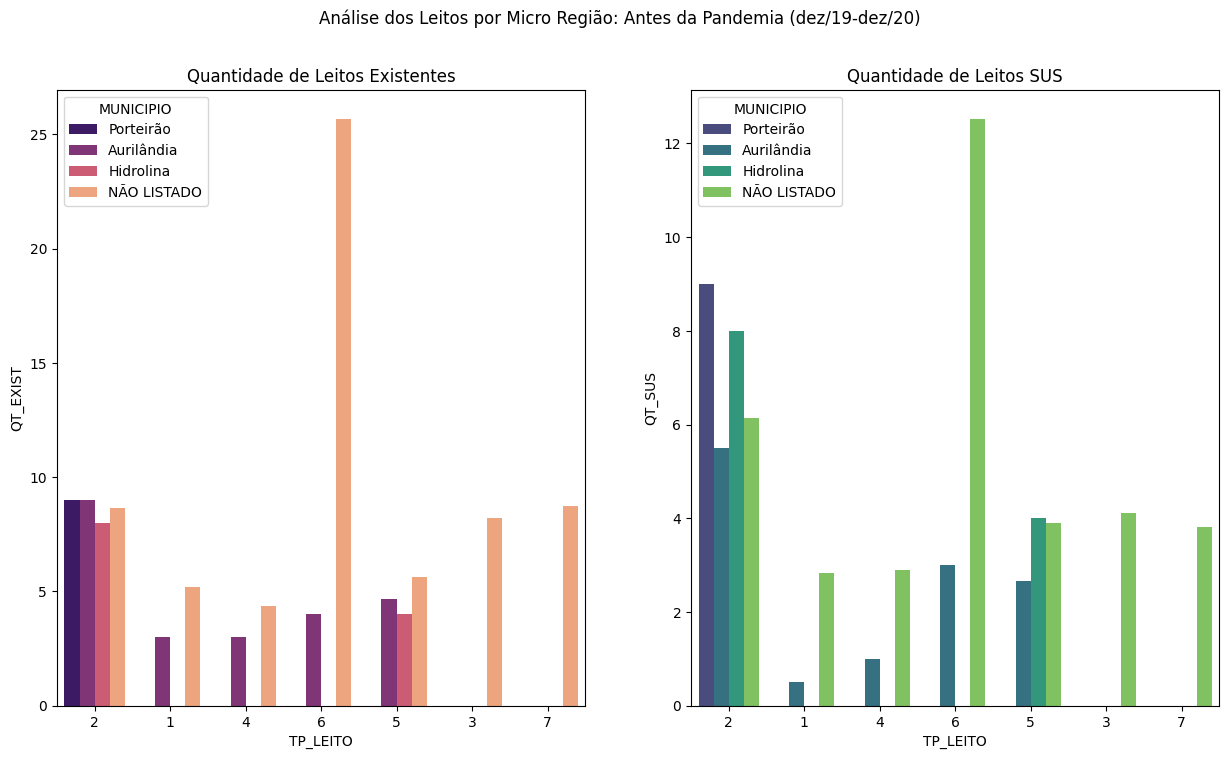

In [34]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,8))
fig.suptitle('Análise dos Leitos por Micro Região: Antes da Pandemia (dez/19-dez/20)')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.barplot(ax=axes[0],data=df_antes,x="TP_LEITO",y="QT_EXIST",hue="MUNICIPIO",palette='magma',errorbar=None)
sns.barplot(ax=axes[1],data=df_antes,x="TP_LEITO",y="QT_SUS",hue="MUNICIPIO",palette='viridis',errorbar=None)

**Resumidamente, teremos em formato tabular:**

In [35]:
query1= """
        SELECT 
               dfa.MESO_REG as "Meso Região",
               SUM(dfa.QT_EXIST) as "Quantidade de Leitos Existente",
               SUM(dfa.QT_SUS) as "Quantidade de Leitos SUS"
        FROM df_antes dfa
        GROUP BY dfa.MESO_REG
        """

query2= """
        SELECT 
               dfa.MICR_REG as "Micro Região",
               SUM(dfa.QT_EXIST) as "Quantidade de Leitos Existente",
               SUM(dfa.QT_SUS) as "Quantidade de Leitos SUS"
        FROM df_antes dfa
        GROUP BY dfa.MICR_REG
        """

query3= """
        SELECT 
               dfa.MUNICIPIO as "Município",
               SUM(dfa.QT_EXIST) as "Quantidade de Leitos Existente",
               SUM(dfa.QT_SUS) as "Quantidade de Leitos SUS"
        FROM df_antes dfa
        GROUP BY dfa.MUNICIPIO
        """

df1,df2,df3 = pd.DataFrame(ps.sqldf(query1,locals())),\
              pd.DataFrame(ps.sqldf(query2,locals())),\
              pd.DataFrame(ps.sqldf(query3,locals()))

print('\t\t#--- Análise dos leitos pré-pandemia ---#\n\n')
print(df1,'\n')
print(df2,'\n')
print(df3)

		#--- Análise dos leitos pré-pandemia ---#


     Meso Região  Quantidade de Leitos Existente  Quantidade de Leitos SUS
0  Centro Goiano                            1176                       700
1    NÃO LISTADO                          282191                    170188
2     Sul Goiano                             126                       126 

  Micro Região  Quantidade de Leitos Existente  Quantidade de Leitos SUS
0           01                           37436                     21912
1           02                           18100                     13364
2           03                          225587                    134040
3  NÃO LISTADO                            2370                      1698 

     Município  Quantidade de Leitos Existente  Quantidade de Leitos SUS
0   Aurilândia                            1008                       532
1    Hidrolina                             168                       168
2  NÃO LISTADO                          282191                    

In [36]:
# Dados referentes ao cenário pós pandemia
query = """
        SELECT 
               *
        FROM df_sintetizado dfs
        WHERE
            dfs.ANO IN ('2021','2022')
            AND dfs.MES IN ('01','02','03','04','05','06',
                            '07','08','09','10','11','12')
        """

df_depois = pd.DataFrame(ps.sqldf(query,locals()))
df_depois

,ANO,MES,MESO_REG,MICR_REG,MUNICIPIO,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS
0,2021,01,Sul Goiano,03,Porteirão,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,2,9,0,9
1,2021,01,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,6,4,0,3
2,2021,01,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,1,2,0,1
3,2021,01,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,5,3,0,3
4,2021,01,Centro Goiano,03,Aurilândia,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,4,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65894,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,1,3,0,3
65895,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,4,3,0,3
65896,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,2,7,0,7
65897,2022,11,NÃO LISTADO,03,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,4,2,0,2


<AxesSubplot: title={'center': 'Quantidade de Leitos SUS'}, xlabel='TP_LEITO', ylabel='QT_SUS'>

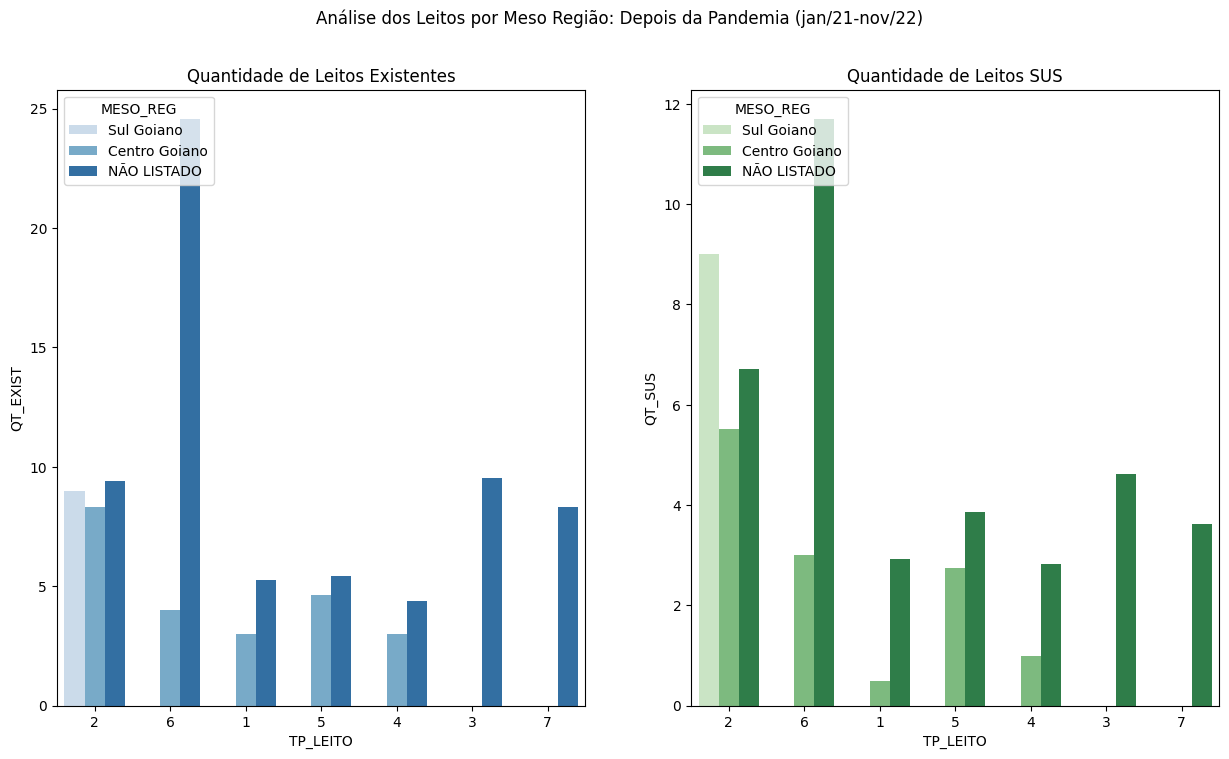

In [37]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,8))
fig.suptitle('Análise dos Leitos por Meso Região: Depois da Pandemia (jan/21-nov/22)')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.barplot(ax=axes[0],data=df_depois,x="TP_LEITO",y="QT_EXIST",hue="MESO_REG",palette='Blues',errorbar=None)
sns.barplot(ax=axes[1],data=df_depois,x="TP_LEITO",y="QT_SUS",hue="MESO_REG",palette='Greens',errorbar=None)

<AxesSubplot: title={'center': 'Quantidade de Leitos SUS'}, xlabel='TP_LEITO', ylabel='QT_SUS'>

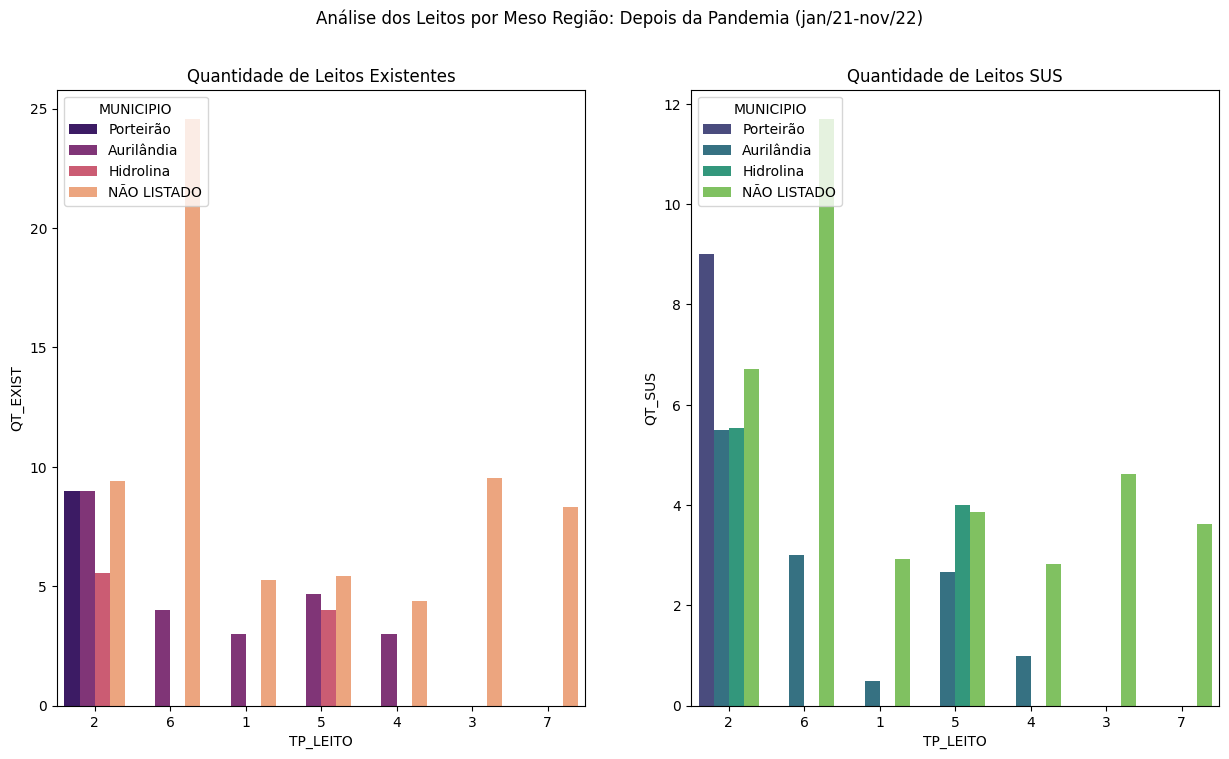

In [38]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,8))
fig.suptitle('Análise dos Leitos por Meso Região: Depois da Pandemia (jan/21-nov/22)')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.barplot(ax=axes[0],data=df_depois,x="TP_LEITO",y="QT_EXIST",hue="MUNICIPIO",palette='magma',errorbar=None)
sns.barplot(ax=axes[1],data=df_depois,x="TP_LEITO",y="QT_SUS",hue="MUNICIPIO",palette='viridis',errorbar=None)

**Resumidamente, teremos em formato tabular:**

In [39]:
query4= """
        SELECT 
               dfd.MESO_REG as "Meso Região",
               SUM(dfd.QT_EXIST) as "Quantidade de Leitos Existente",
               SUM(dfd.QT_SUS) as "Quantidade de Leitos SUS"
        FROM df_depois dfd
        GROUP BY dfd.MESO_REG
        """

query5= """
        SELECT 
               dfd.MICR_REG as "Micro Região",
               SUM(dfd.QT_EXIST) as "Quantidade de Leitos Existente",
               SUM(dfd.QT_SUS) as "Quantidade de Leitos SUS"
        FROM df_depois dfd
        GROUP BY dfd.MICR_REG
        """

query6= """
        SELECT 
               dfd.MUNICIPIO as "Município",
               SUM(dfd.QT_EXIST) as "Quantidade de Leitos Existente",
               SUM(dfd.QT_SUS) as "Quantidade de Leitos SUS"
        FROM df_depois dfd
        GROUP BY dfd.MUNICIPIO
        """

df4,df5,df6 = pd.DataFrame(ps.sqldf(query4,locals())),\
              pd.DataFrame(ps.sqldf(query5,locals())),\
              pd.DataFrame(ps.sqldf(query6,locals()))

print('\t\t#--- Análise dos leitos pós-pandemia ---#\n\n')
print(df4,'\n','-'*90,'\n')
print(df5,'\n','-'*90,'\n')
print(df6)

		#--- Análise dos leitos pós-pandemia ---#


     Meso Região  Quantidade de Leitos Existente  Quantidade de Leitos SUS
0  Centro Goiano                            1722                       974
1    NÃO LISTADO                          485786                    291279
2     Sul Goiano                             198                       198 
 ------------------------------------------------------------------------------------------ 

  Micro Região  Quantidade de Leitos Existente  Quantidade de Leitos SUS
0           01                           62267                     34502
1           02                           35839                     27151
2           03                          387114                    229115
3  NÃO LISTADO                            2486                      1683 
 ------------------------------------------------------------------------------------------ 

     Município  Quantidade de Leitos Existente  Quantidade de Leitos SUS
0   Aurilândia            

In [40]:
diff_qe = []
w_qe = []
for x,y in zip(df4['Quantidade de Leitos Existente'],df1['Quantidade de Leitos Existente']):
    diff_qe.append(abs(x-y))
    if x > y:
        w_qe.append('aumento')
    elif x < y:
        w_qe.append('descréscimo')
    else:
        w_qe.append('manteve')

diff_sus = []
w_sus = []
for x,y in zip(df4['Quantidade de Leitos SUS'],df1['Quantidade de Leitos SUS']):
    diff_sus.append(abs(x-y))
    if x > y:
        w_sus.append('aumento')
    elif x < y:
        w_sus.append('descréscimo')
    else:
        w_sus.append('manteve')

pd.DataFrame({
    'Meso Região':df4['Meso Região'],
    'Diferença na Quantidade de Leitos Existentes':diff_qe,
    'O que ocorreu de um cenário para o outro (leitos existentes)?':w_qe,
    'Diferença na Quantidade de Leitos SUS':diff_sus,
    'O que ocorreu de um cenário para o outro (leitos SUS)?':w_sus
})

,Meso Região,Diferença na Quantidade de Leitos Existentes,O que ocorreu de um cenário para o outro (leitos existentes)?,Diferença na Quantidade de Leitos SUS,O que ocorreu de um cenário para o outro (leitos SUS)?
0,Centro Goiano,546,aumento,274,aumento
1,NÃO LISTADO,203595,aumento,121091,aumento
2,Sul Goiano,72,aumento,72,aumento


In [41]:
diff_qe = []
w_qe = []
for x,y in zip(df5['Quantidade de Leitos Existente'],df2['Quantidade de Leitos Existente']):
    diff_qe.append(abs(x-y))
    if x > y:
        w_qe.append('aumento')
    elif x < y:
        w_qe.append('descréscimo')
    else:
        w_qe.append('manteve')

diff_sus = []
w_sus = []
for x,y in zip(df5['Quantidade de Leitos SUS'],df2['Quantidade de Leitos SUS']):
    diff_sus.append(abs(x-y))
    if x > y:
        w_sus.append('aumento')
    elif x < y:
        w_sus.append('descréscimo')
    else:
        w_sus.append('manteve')

pd.DataFrame({
    'Micro Região':df5['Micro Região'],
    'Diferença na Quantidade de Leitos Existentes':diff_qe,
    'O que ocorreu de um cenário para o outro (leitos existentes)?':w_qe,
    'Diferença na Quantidade de Leitos SUS':diff_sus,
    'O que ocorreu de um cenário para o outro (leitos SUS)?':w_sus
})

,Micro Região,Diferença na Quantidade de Leitos Existentes,O que ocorreu de um cenário para o outro (leitos existentes)?,Diferença na Quantidade de Leitos SUS,O que ocorreu de um cenário para o outro (leitos SUS)?
0,01,24831,aumento,12590,aumento
1,02,17739,aumento,13787,aumento
2,03,161527,aumento,95075,aumento
3,NÃO LISTADO,116,aumento,15,descréscimo


In [42]:
diff_qe = []
w_qe = []
for x,y in zip(df6['Quantidade de Leitos Existente'],df3['Quantidade de Leitos Existente']):
    diff_qe.append(abs(x-y))
    if x > y:
        w_qe.append('aumento')
    elif x < y:
        w_qe.append('descréscimo')
    else:
        w_qe.append('manteve')

diff_sus = []
w_sus = []
for x,y in zip(df6['Quantidade de Leitos SUS'],df3['Quantidade de Leitos SUS']):
    diff_sus.append(abs(x-y))
    if x > y:
        w_sus.append('aumento')
    elif x < y:
        w_sus.append('descréscimo')
    else:
        w_sus.append('manteve')

pd.DataFrame({
    'Município':df6['Município'],
    'Diferença na Quantidade de Leitos Existentes':diff_qe,
    'O que ocorreu de um cenário para o outro (leitos existentes)?':w_qe,
    'Diferença na Quantidade de Leitos SUS':diff_sus,
    'O que ocorreu de um cenário para o outro (leitos SUS)?':w_sus
})

,Município,Diferença na Quantidade de Leitos Existentes,O que ocorreu de um cenário para o outro (leitos existentes)?,Diferença na Quantidade de Leitos SUS,O que ocorreu de um cenário para o outro (leitos SUS)?
0,Aurilândia,576,aumento,304,aumento
1,Hidrolina,30,descréscimo,30,descréscimo
2,NÃO LISTADO,203595,aumento,121091,aumento
3,Porteirão,72,aumento,72,aumento


**Das análises anteriores, podemos observar que do comparativo dos cenários pré e pós-pandemia temos um aumento do número de leitos por cada região de interesse, incluindo alguns dos municípios listados (Aurilândia e Porteirão). Podemos observar um descréscimo quando comparamos os dois cenários na micro região de Ceres e no município de Hidrolina. Além disso, os agrupamentos tidos como "NÃO LISTADO" apresentaram o maior salto para cada uma das análises por região - isso poderia ser melhor compreendido caso a base de dados original fosse melhor representada pelas localidades, uma vez que a distribuição da quantidade de leitos muito possivelmente iria ser dividida entre os novos registros e os pré-existentes com relação às informações geográficas. Mas de uma forma geral podemos concluir que houve aumento do número de leitos, tanto da parte dos leitos existentes quanto da parte dos leitos do SUS de um cenário para o outro.**

## (iv) Análise evolutiva do número de leitos no tempo

In [43]:
df_19 = df_sintetizado.loc[(df_sintetizado['ANO']=='2019')]
df_20 = df_sintetizado.loc[(df_sintetizado['ANO']=='2020')]
df_21 = df_sintetizado.loc[(df_sintetizado['ANO']=='2021')]
df_22 = df_sintetizado.loc[(df_sintetizado['ANO']=='2022')]

**Série Temporal de 2019: diferente dos demais, o ano de 2019 apresenta um único mês. Desta forma, iremos analisar a evolução dos registros pelo índice da base de dados, isto é, iremos representar cada registro quantitativo ao passo que evoluímos na leitura das linhas para este ano em específico. Isso não é essencialmente uma série temporal, mas representa os registros feitos ao longo do tempo (como a base foi devidamente construída)**

In [44]:
# criando o campo de índices
df_19['index'] = [i for i in range(len(df_19))]

/tmp/ipykernel_6363/4193136757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['index'] = [i for i in range(len(df_19))]


Text(0.5, 0, 'ID registro')

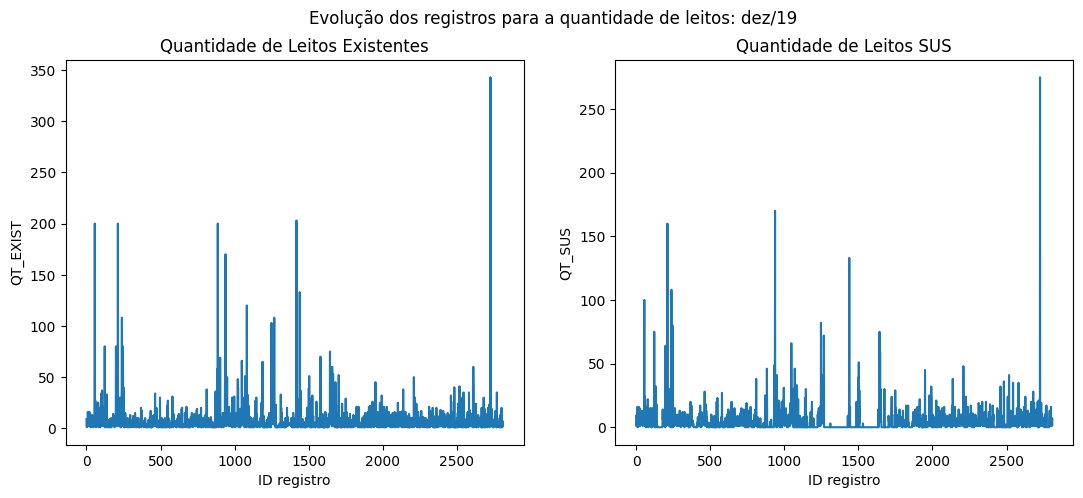

In [50]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
fig.suptitle('Evolução dos registros para a quantidade de leitos: dez/19')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.lineplot(ax=axes[0],data=df_19,x="index",y="QT_EXIST",errorbar=None)
sns.lineplot(ax=axes[1],data=df_19,x="index",y="QT_SUS",errorbar=None)
axes[0].set_xlabel('ID registro');axes[1].set_xlabel('ID registro')

**Não é possível tirar conclusões diretas desta série (dada a falta de variação nos meses do respectivo ano), talvez se os registros da base de dados original fossem relacionados aos dias nos quais as leituras foram geradas isso seria melhorado de forma expressiva. No entanto, podemos observar um comportamento bem próximo entre as quantidades de leitos existentes e SUS, principalmente após o ID de registro 2500 (em que há um aumento evidente na quantidade). Isso pode sugerir que a demanda por leitos começou a aumentar bastante devido ao aumento no número dos casos (início da pandemia).**

**Série Temporal de 2020**

<AxesSubplot: title={'center': 'Quantidade de Leitos SUS'}, xlabel='MES', ylabel='QT_SUS'>

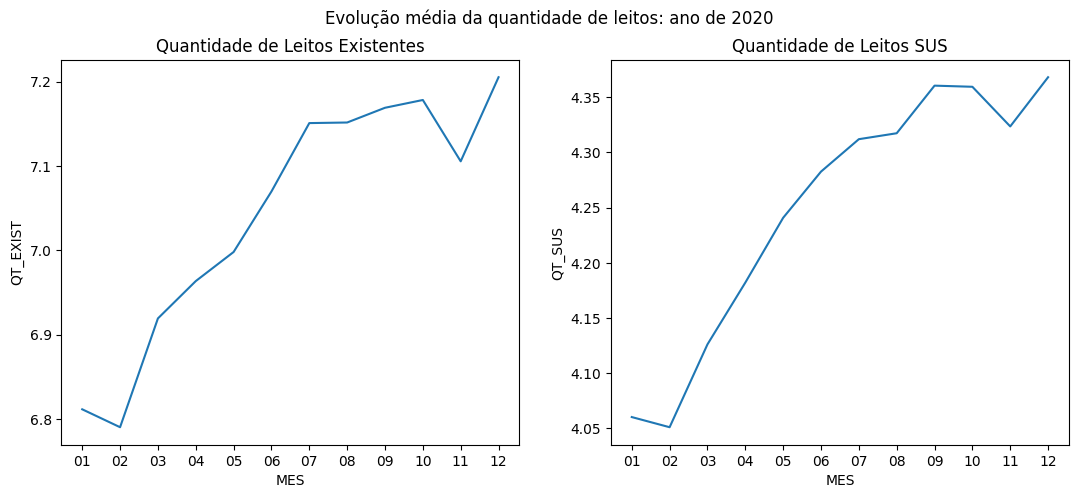

In [51]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
fig.suptitle('Evolução média da quantidade de leitos: ano de 2020')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.lineplot(ax=axes[0],data=df_20,x="MES",y="QT_EXIST",errorbar=None)
sns.lineplot(ax=axes[1],data=df_20,x="MES",y="QT_SUS",errorbar=None)

**Podemos observar que para a série de 2020 temos um comportamento bem próximo entre a quantidade de leitos existentes e a quantidade de leitos do SUS. Isso é bastante factível, pois esta série é referente a um cenário anterior à aplicação das vacinas, o que teve maior demanda de instalação de leitos.**

**Série Temporal de 2021**

<AxesSubplot: title={'center': 'Quantidade de Leitos SUS'}, xlabel='MES', ylabel='QT_SUS'>

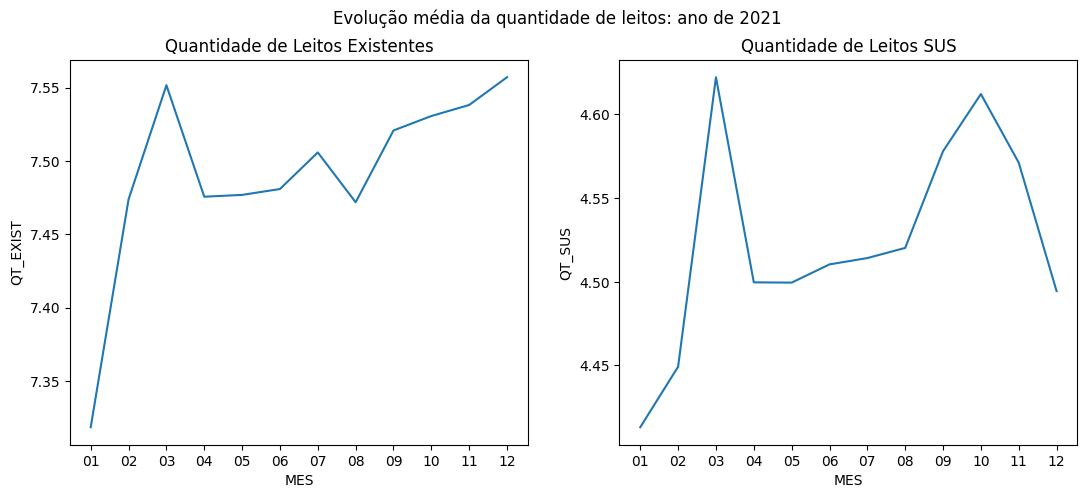

In [52]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
fig.suptitle('Evolução média da quantidade de leitos: ano de 2021')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.lineplot(ax=axes[0],data=df_21,x="MES",y="QT_EXIST",errorbar=None)
sns.lineplot(ax=axes[1],data=df_21,x="MES",y="QT_SUS",errorbar=None)

**Na série de 2021 observamos que os comportamentos para a quantidade de leitos SUS e leitos existentes se mostram próximos quando comparados um com o outro entre os meses 01 e 03 (janeiro a março, respectivamente), seguidos de um declínio entre os meses 03 e 04 (março e abril). No entanto, existe uma diferença evidente entre os meses 09 e 12 (setembro a dezembro do mesmo ano): enquanto pode-se notar um aumento no número de leitos existentes, a quantidade de leitos SUS cai de forma expressiva.**

**Série Temporal de 2022**

<AxesSubplot: title={'center': 'Quantidade de Leitos SUS'}, xlabel='MES', ylabel='QT_SUS'>

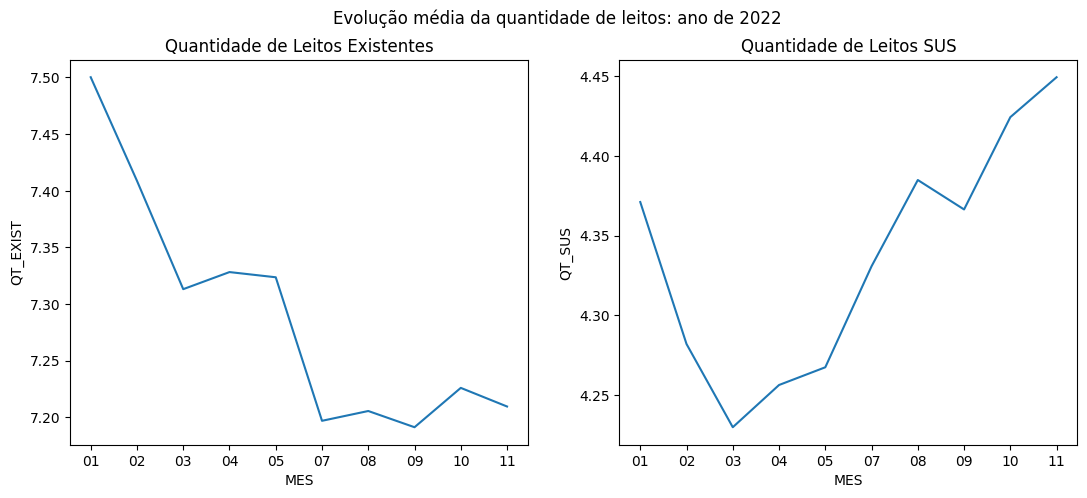

In [53]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
fig.suptitle('Evolução média da quantidade de leitos: ano de 2022')
axes[0].set_title('Quantidade de Leitos Existentes');axes[1].set_title('Quantidade de Leitos SUS')
sns.lineplot(ax=axes[0],data=df_22,x="MES",y="QT_EXIST",errorbar=None)
sns.lineplot(ax=axes[1],data=df_22,x="MES",y="QT_SUS",errorbar=None)

**Nesta série podemos observar, novamente, um comportamento próximo das duas quantidades de leitos existentes, de janeiro à março do mesmo ano (meses 01 a 03), seguido por um leve aumento de março a abril. Entretanto, após o mês de maio (05), podemos observar um aumento expressivo na quantidade de leitos SUS, ao passo que a quantidade de leitos existentes tende a decair no estado de Goias. No sentido geral, para todas as séries temporais observadas, a quantidade média de leitos existentes sempre se manteve superior à quantidade média de leitos SUS.**

## (v) Análise do declínio na capacidade hospitalar instalada

**No caso, não pôde ser observado um declínio na capacidade hospitalar instalada pela falta de uma variável explícita para essa métrica (o dicionário dos dados original não traz algo auto-explicativo para isso de forma intuitiva). Isso poderia ser implementado, no entanto, com a aplicação de Feature Engineering através da união com fontes de dados complementares, ou até mesmo do conhecimento técnico na área em aproveitar as variáveis previamente existentes e gerar novos insights a partir delas.**